**Studi Kasus**

Studi kasus ini membahas tentang memahami preferensi konsumen dan meningkatkan kualitas produk cokelat berdasarkan histori rating cokelat batangan. Data ini juga berisi tentang informasi tentang berbagai karakteristik cokelat, seperti presentasi kakao, asal biji kakao, dan rating yang diberikan pelanggan.

**BUSINESS UNDERSTANDING**

**Business Objective**

Tujuan utama dataset ini adalah memahami tren pelanggan dan pasar cokelat untuk meningkatkan kualitas produk cokelat yang sesuai dengan preferensi pelanggan. Selain itu, dengan menggunakan data dapat membuat strategi pemasaran yang efektif agar menciptakan produk yang sesuai dengan selera pasar untuk meningkatkan kepuasan pelanggan.

**Assess Situation**

Dari analisis ini dapat dinilai bahwa rating produk memiliki potensi besar untuk memberikan informasi penting tentang preferensi pelanggan terhadap cokelat batangan. Namun, beberapa masalah perlu ditangani, seperti kualiatas kakao dan asal biji kakao. Oleh karena itu, memperbaiki kualitas produk sangat penting untuk meningkatkan kepuasan pelanggan dengan memilih produk yang diminati.

**Data Mining Goals**

Menganalisis tren pelanggan dan pasar cokelat untuk memperkirakan perubahan preferensi pelanggan dan mengidentifikasi produk dengan rating sangat tinggi atau sangat rendah untuk mengetahui produk yang sesuai dengan selera pasar.

**Project Plan**

Tahapan Project Plan:
1. Menentukan tujuan
2. Menerapkan timeline
3. Memilih sumber daya
4. Menentukan hasil
6. Menganalisis resiko

Dengan tujuan meningkatkan kualitas cokelat dan kepuasan pelanggan, project plan ini bertujuan untuk menganalisis data. Project plan diharapkan dapat memberikan insight yang bermanfaat dan diterapkan bagi pelanggan dengan mengikuti prosedur dan timeline yang diatur.

**DATA PREPARATION**

In [3]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/flavors_of_cacao.csv')

df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


**Struktur Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   object 
 3   Cocoa
Percent                     1795 non-null   object 
 4   Company
Location                  1795 non-null   object 
 5   Rating                            1795 non-null   float64
 6   Bean
Type                         1795 non-null   object 
 7   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), object(7)
memory usage: 112.3+ KB


**Statistik Deskriptif**

In [ ]:
df.describe()

,Rating
count,1795.000000
mean,3.190146
std,0.459812
min,1.937500
25%,2.875000
50%,3.250000
75%,3.500000
max,4.437500


In [ ]:
df.corr(numeric_only=True)

,Rating
Rating,1.0


**Missing Values**

In [ ]:
(df.isna().sum()/len(df))*100

,0
Company \n(Maker-if known),0.00000
Specific Bean Origin\nor Bar Name,0.00000
REF,0.00000
Review\nDate,0.00000
Cocoa\nPercent,0.00000
Company\nLocation,0.00000
Rating,0.00000
Bean\nType,0.05571
Broad Bean\nOrigin,0.05571


Melakukan pengecekan nilai kosong pada Bean\nType

In [ ]:
df[df['Bean\nType'].isnull()]

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


Pada kolom Bean\nType akan diimputasi karna data yang hilang berada di angka 	0.05571

In [ ]:
df['Bean\nType'].dropna().describe()

,Bean\nType
count,1794
unique,41
top,
freq,887


Berdasarkan analisis statistik, mean tidak terdapat pada kolom Bean\nType, maka dari itu kita akan menggunakan 'frequensi' sebagai gantinya

In [ ]:
df['Bean\nType'] = df['Bean\nType'].fillna(df['Bean\nType'].mode()[0])

df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


**Duplicated Values**

In [ ]:
df[df.duplicated()]

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin


karena tidak ada data atau kolom yang terduplikasi, maka tidak perlu penanganan

**Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
REF,0.000000
Review\nDate,0.000000
Rating,1.058496


karena nilai Rating kurang dari 10%, maka diperlukan penanganan.

melakukan imputasi

In [ ]:
columns_to_impute = ["Rating"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menggunakan .loc[] agar tidak muncul SettingWithCopyWarning
    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

pengecekan ulang

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
REF,0.0
Review\nDate,0.0
Rating,0.0


In [ ]:
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,1970-01-01 00:00:00.000002016,63%,France,3.75,,SAO TOME
1,A. Morin,Kpime,1676,1970-01-01 00:00:00.000002015,70%,France,2.75,,TOGO
2,A. Morin,Atsane,1676,1970-01-01 00:00:00.000002015,70%,France,3.00,,TOGO
3,A. Morin,Akata,1680,1970-01-01 00:00:00.000002015,70%,France,3.50,,TOGO
4,A. Morin,Quilla,1704,1970-01-01 00:00:00.000002015,70%,France,3.50,,PERU
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,1970-01-01 00:00:00.000002011,70%,Austria,3.75,,PERU
1791,Zotter,Congo,749,1970-01-01 00:00:00.000002011,65%,Austria,3.00,Forastero,CONGO
1792,Zotter,Kerala State,749,1970-01-01 00:00:00.000002011,65%,Austria,3.50,Forastero,INDIA
1793,Zotter,Kerala State,781,1970-01-01 00:00:00.000002011,62%,Austria,3.25,,INDIA


**Inconsistent Data**

In [ ]:
df["Broad Bean\nOrigin"] = df["Broad Bean\nOrigin"].str.upper()

df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,1970-01-01 00:00:00.000002016,63%,France,3.75,,SAO TOME
1,A. Morin,Kpime,1676,1970-01-01 00:00:00.000002015,70%,France,2.75,,TOGO
2,A. Morin,Atsane,1676,1970-01-01 00:00:00.000002015,70%,France,3.00,,TOGO
3,A. Morin,Akata,1680,1970-01-01 00:00:00.000002015,70%,France,3.50,,TOGO
4,A. Morin,Quilla,1704,1970-01-01 00:00:00.000002015,70%,France,3.50,,PERU
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,1970-01-01 00:00:00.000002011,70%,Austria,3.75,,PERU
1791,Zotter,Congo,749,1970-01-01 00:00:00.000002011,65%,Austria,3.00,Forastero,CONGO
1792,Zotter,Kerala State,749,1970-01-01 00:00:00.000002011,65%,Austria,3.50,Forastero,INDIA
1793,Zotter,Kerala State,781,1970-01-01 00:00:00.000002011,62%,Austria,3.25,,INDIA


**Construct Data**

In [ ]:
df["high_flavor"] = pd.to_numeric(df["Review\nDate"], errors='coerce') / (df["Rating"] + 1)

In [ ]:
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,high_flavor
0,A. Morin,Agua Grande,1876,1970-01-01 00:00:00.000002016,63%,France,3.75,,SAO TOME,NaN
1,A. Morin,Kpime,1676,1970-01-01 00:00:00.000002015,70%,France,2.75,,TOGO,NaN
2,A. Morin,Atsane,1676,1970-01-01 00:00:00.000002015,70%,France,3.00,,TOGO,NaN
3,A. Morin,Akata,1680,1970-01-01 00:00:00.000002015,70%,France,3.50,,TOGO,NaN
4,A. Morin,Quilla,1704,1970-01-01 00:00:00.000002015,70%,France,3.50,,PERU,NaN
...,...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,1970-01-01 00:00:00.000002011,70%,Austria,3.75,,PERU,NaN
1791,Zotter,Congo,749,1970-01-01 00:00:00.000002011,65%,Austria,3.00,Forastero,CONGO,NaN
1792,Zotter,Kerala State,749,1970-01-01 00:00:00.000002011,65%,Austria,3.50,Forastero,INDIA,NaN
1793,Zotter,Kerala State,781,1970-01-01 00:00:00.000002011,62%,Austria,3.25,,INDIA,NaN


**Data Reduction**

In [ ]:
df = df.drop(columns=['high_flavor'])

In [ ]:
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,63%,France,3.75,,SAO TOME
1,A. Morin,Kpime,1676,70%,France,2.75,,TOGO
2,A. Morin,Atsane,1676,70%,France,3.00,,TOGO
3,A. Morin,Akata,1680,70%,France,3.50,,TOGO
4,A. Morin,Quilla,1704,70%,France,3.50,,PERU
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,70%,Austria,3.75,,PERU
1791,Zotter,Congo,749,65%,Austria,3.00,Forastero,CONGO
1792,Zotter,Kerala State,749,65%,Austria,3.50,Forastero,INDIA
1793,Zotter,Kerala State,781,62%,Austria,3.25,,INDIA


**Visualisasi Data**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/flavors_of_cacao.csv')

df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


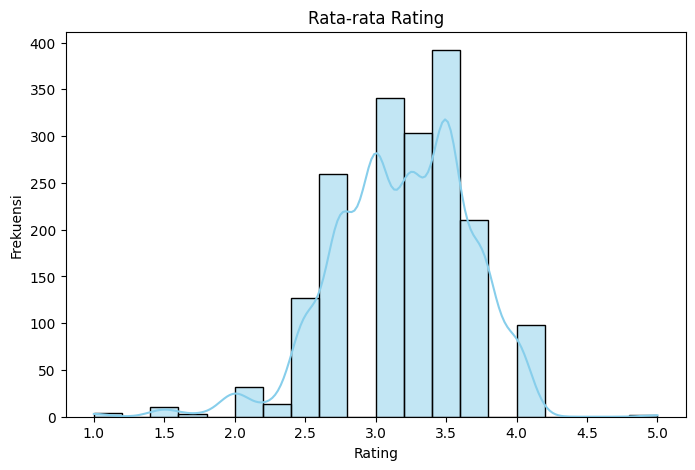

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Rata-rata Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

**Insight dan Tindakan**

insight : Sebagian besar cokelat memiliki nilai antara 3.0 hingga 4.0, menunjukkan bahwa sebagian besar produk berada di kisaran menengah.

tindakan : melakukan perbaikan pada cokelat dengan rating rendah. selain itu, meningkatkan dan mengoptimalkan kualitas dari cokelat.

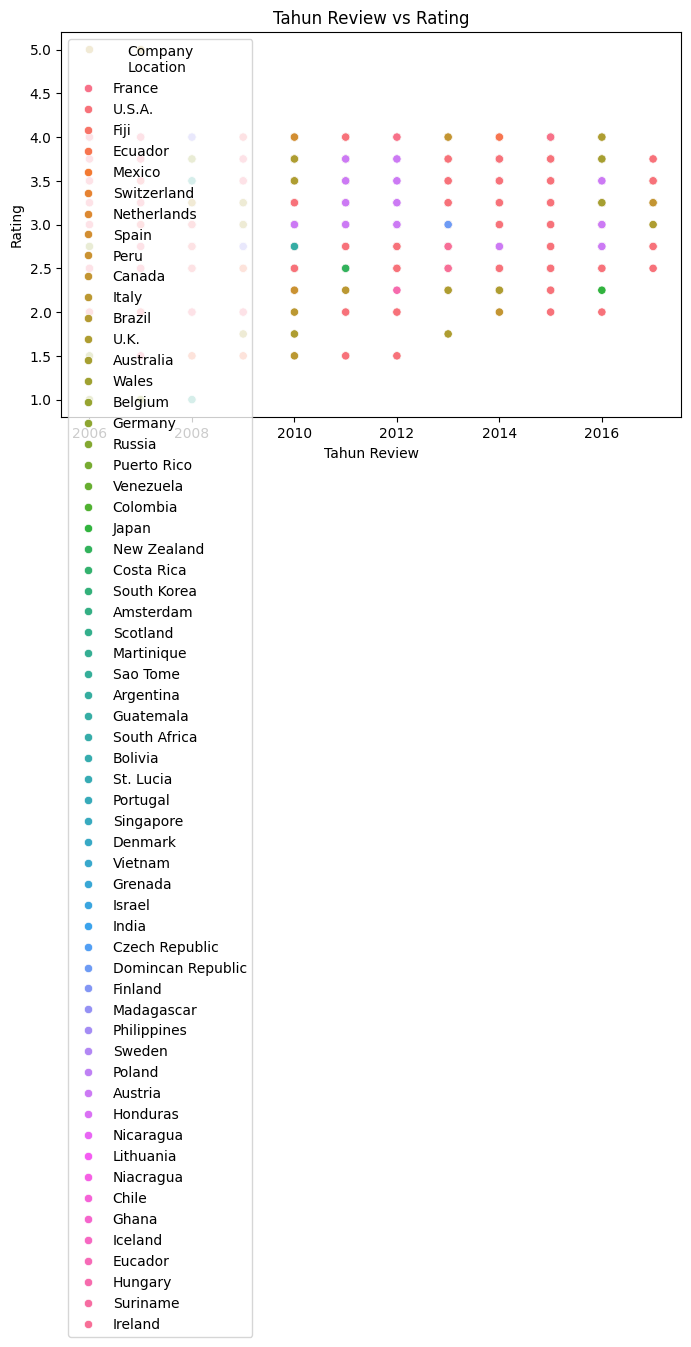

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Review\nDate', y='Rating', hue='Company\nLocation', data=df)
plt.title('Tahun Review vs Rating')
plt.xlabel('Tahun Review')
plt.ylabel('Rating')
plt.legend(title='Company\nLocation')
plt.show()

**Insight dan Tindakan**

insight : terdapat peningkatan dan penurunan dari tahun ke tahun.

tindakan : jika rating meningkat, pertahankan metode produksinya. dan jika rating menurun, lakukan riset pasar.

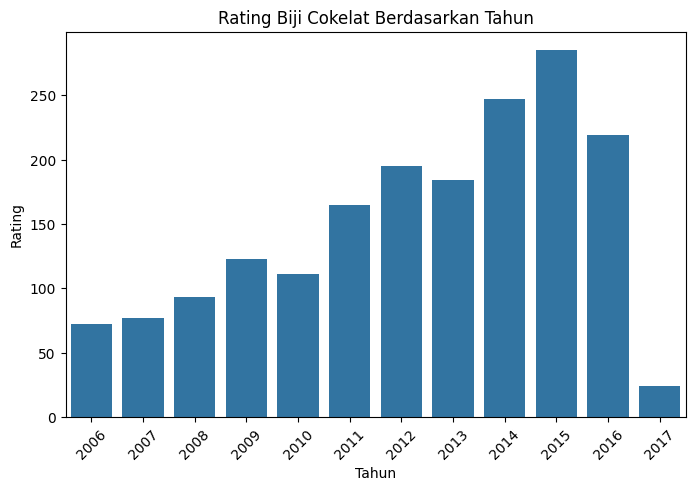

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Review\nDate', data=df)
plt.title('Rating Biji Cokelat Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

**Insight dan Tindakan**

insight : rating rata-rata cokelat berubah dari tahun ke tahun, yang menunjukkan bahwa kualitas produk yang dinilai berbeda.

tindakan : lakukan riset lebih lanjut terkait faktor yang memengaruhi rating, dan menjaga konsisten kualitas produk